<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 31, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [4]:
#training y test

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de prueba tiene {test.shape[0]} registros")

El conjunto de datos de entrenamiento tiene 800 registros
El conjunto de datos de prueba tiene 200 registros


###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [5]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [6]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values
 
X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
##Naive Bayes
nb = MultinomialNB()

In [9]:
# Entrenamos los modelos
nb.fit(X_train, y_train)

MultinomialNB()

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [10]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_nb = nb.predict(X_test)
y_pred_nb

array(['video_games', 'video_games', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'jewelry', 'jewelry',
       'video_games', 'video_games', 'jewelry', 'jewelry', 'video_games',
       'video_games', 'jewelry', 'jewelry', 'video_games', 'jewelry',
       'video_games', 'jewelry', 'video_games', 'jewelry', 'video_games',
       'jewelry', 'jewelry', 'jewelry', 'video_games', 'jewelry',
       'video_games', 'jewelry', 'video_games', 'jewelry', 'video_games',
       'jewelry', 'jewelry', 'jewelry', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'video_games', 'jewelry', 'video_games', 'jewelry',
       'jewelry', 'video_games', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'jewelry', 'jewelry',
       'video_games', 'video_games', 'video_games', 'video_games',
       'video_games', 'video_games', 'video_games', 'jewelry',
       'video_games', 'video_games', 'jewelry', 'video_games',
       'video_games', 'jewelry', 'vide

In [11]:
##EXACTITUD
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")

Naive Bayes:            0.86


In [12]:
##OTRAS METRICAS
metricas = [precision_score, recall_score, f1_score]
 
for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):>15.2f}")
    print()

precision_score
Naive Bayes:            0.81

recall_score
Naive Bayes:            0.95

f1_score
Naive Bayes:            0.87



###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Naive Bayes')

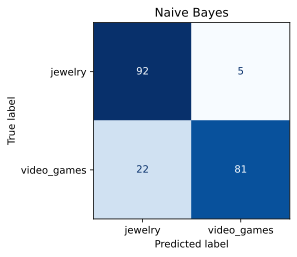

In [13]:
## matriz de confusion para Naive Bayes

%config InlineBackend.figure_format = 'svg'
 
fig = plt.figure(figsize=(15,15))
 
ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

In [14]:
vocab = {value:key for key, value in tfidf_vect.vocabulary_.items()}

In [15]:
## PALABRAS MAS IMPORTANTES PARA LA CATEGORIA VIDEO JUEGO
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(),sorted(nb.coef_[0]))][-10:]

[('caja', -6.52),
 ('jugar', -6.51),
 ('si', -6.35),
 ('buen', -6.32),
 ('mando', -6.29),
 ('precio', -6.23),
 ('producto', -6.1),
 ('perfecto', -6.01),
 ('bien', -5.82),
 ('juego', -5.55)]

In [16]:
## PALABRAS MAS IMPORTANTES PARA LA CATEGORIA JOYERIA
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(),sorted(nb.coef_[0]))][:10]

[('equivocarse', -8.42),
 ('excepcional', -8.42),
 ('segun', -8.42),
 ('exacta', -8.42),
 ('evilla', -8.42),
 ('sello', -8.42),
 ('estupendas', -8.42),
 ('semi', -8.42),
 ('estrené', -8.42),
 ('estrellitas', -8.42)]

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [17]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

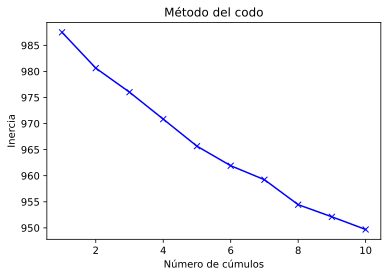

In [18]:
#obtener codo
ks = []
k_inertia = []
 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)

plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertia, 'bx-')

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [19]:
## SE ESCOGIO UN K=2 YA QUE EL METODO DEL CODO NO ES CLARO
k = 2
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(tfidf_matrix.values)

In [20]:
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)
 
centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()
 
print(f"CLUSTERS:\n")

for i in range(k):
    print(f"Cluster #{i}")
    print(f"{clust_cnt[i]} textos ({clust_cnt_pct[i]:.2%} de los datos)")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :15]:
        print(f"{terms[idx]}", end=" ")
    print("\n")
    print(f"Textos Representativos")
    for texto in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]]['review_body'].values:
        print(f"* {texto}")
    print("\n")

CLUSTERS:

Cluster #0
188 textos (18.80% de los datos)
TERMINOS:  calidad precio buena bien buen mala regalo cadena bastante parece puede pedir aunque cierre bonito 

Textos Representativos
* Esta bien calidad precio
* Calidad precio buena
* Calidad precio muy buena


Cluster #1
812 textos (81.20% de los datos)
TERMINOS:  juego bien producto perfecto bonito si llegado foto regalo mas tiempo llegó día bonitos llego 

Textos Representativos
* Bonito fue para un regalo y bien
* El producto en buen estado. Perfecto.
* Llegó a tiempo y en perfecto estado




###  `[BONUS: 3 pts]` Visualización usando PCA

In [24]:
##nombrar cluster
clusters = {0:'JOYERIA',
            1:'VIDEO JUEGOS'}

data['cluster_name'] = data['cluster'].apply(lambda val: clusters[val])
data['texto_peq'] = data['review_body'].apply(lambda texto: texto[:100])
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,cluster_name,texto_peq
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,0,JOYERIA,"Buen. Buena calidad, y buena presentación."
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,1,VIDEO JUEGOS,"Un producto a perfecto, para salir de casa con..."
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,1,VIDEO JUEGOS,No funciona con Nintendo Switch. No hay forma ...
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,1,VIDEO JUEGOS,"Recomendado, los utilizo para pc y no me dan n..."
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,1,VIDEO JUEGOS,El cable funciona bien podria ser un poco mas ...
...,...,...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,0,JOYERIA,En la foto parece que la cadena sea más gruesa...
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,0,JOYERIA,"Bien por su precio, la cadena demasiado fina."
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,1,VIDEO JUEGOS,Muy bien!! Ahora tengo organizados los pendien...
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,1,VIDEO JUEGOS,"Las tapas para los joystics no están nada mal,..."


In [26]:
pca = PCA(n_components=2)
 
result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.texto_peq.values
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="PCA")
 
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [23]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
# transformar con tfidf usado para clasificación
# transformar con tfidf usado para agrupación

# resultado para clasificación
# resultado para agrupación

### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor? 
- ¿Cuál modelo se demoró más en entrenar? 
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
- ¿Alguna otra observación?